In [94]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn import metrics


test_real = pd.read_csv('test_real.csv', sep = ',')
test_fake = pd.read_csv('test_fake.csv', sep = ',')
train_real = pd.read_csv('train_real.csv', sep = ',')
train_fake = pd.read_csv('train_fake.csv', sep = ',')
validation_real =  pd.read_csv('validation_real.csv', sep = ',')
validation_fake =  pd.read_csv('validation_fake.csv', sep = ',')


In [95]:
#test_real = test_real.loc[:, ~test_real.columns.str.contains('^Unnamed')]
#test_fake = test_fake.loc[:, ~test_fake.columns.str.contains('^Unnamed')]

test_real.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.0,0.0,0.0,0.041396,0.0,0.0,0.000000,0.0,1.405248,...,0.0,0.486358,0.0,1.632487,0.227844,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.054321,0.0,0.0,0.000000,0.0,1.655350,...,0.0,0.235179,0.0,1.995751,0.135866,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.303139,0.0,0.0,0.000000,0.0,1.405931,...,0.0,0.229163,0.0,2.867099,0.281707,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,3.031069,...,0.0,0.000000,0.0,2.490180,1.227384,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.486745,0.0,0.0,0.757536,0.0,2.236415,...,0.0,0.024444,0.0,2.224182,1.301282,0.0,0.0,0.0,0.0,0.0


In [96]:
test_fake.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,3.288760,...,0.0,0.00000,0.0,0.000000,0.000000,0.321906,0.000000,0.000000,0.0,1.105695
1,1,1.830697,0.0,0.125534,0.0,0.0,0.0,2.976359,0.0,0.716824,...,0.0,0.00000,0.0,1.922979,1.281085,0.935895,2.031592,4.521828,0.0,2.858896
2,2,0.459322,0.0,0.555405,0.0,0.0,0.0,1.951774,0.0,1.326643,...,0.0,0.00000,0.0,1.821688,1.493509,0.535573,1.671195,2.100767,0.0,3.138496
3,3,1.855711,0.0,1.040388,0.0,0.0,0.0,3.268197,0.0,1.491390,...,0.0,0.27282,0.0,2.397863,1.068802,0.436531,1.450065,3.064227,0.0,4.000470
4,4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.048402,...,0.0,0.00000,0.0,0.010300,0.000000,0.020155,0.000000,0.000000,0.0,1.528414


In [97]:
# add the labels to the dataset. is_fake = 

is_fake = np.zeros((test_real.shape[0],1))
test_real['is_fake'] = is_fake

is_fake = np.zeros((train_real.shape[0],1))
train_real['is_fake'] = is_fake

is_fake = np.zeros((validation_real.shape[0],1))
validation_real['is_fake'] = is_fake

is_fake = np.ones((test_fake.shape[0],1))
test_fake['is_fake'] = is_fake

is_fake = np.ones((train_fake.shape[0],1))
train_fake['is_fake'] = is_fake

is_fake = np.ones((validation_fake.shape[0],1))
validation_fake['is_fake'] = is_fake


In [98]:
# merge the dataframes so that all testing, training and validation data are together 

training = [train_real, train_fake, validation_fake, validation_real]
train_df = pd.concat(training)
train_labels = train_df['is_fake']
train_df = train_df.drop(labels = ['is_fake'], axis = 1)

testing = [test_real, test_fake]
test_df = pd.concat(testing)
test_labels = test_df['is_fake']
test_df = test_df.drop(labels = ['is_fake'], axis = 1)


#validate = [validation_fake, validation_real]
#validate_df = pd.concat(validate)


In [99]:
train_df.shape

(392, 4097)

In [100]:
#removing an extra random column from the csv
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]


In [101]:
test_labels

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
Name: is_fake, Length: 95, dtype: float64

Since we are using crossvalidation, we merged the validation and training dataframes

In [109]:
train_arr = train_df.to_numpy()
test_arr = test_df.to_numpy()#classes_arr = classes[1].to_numpy()
train_labels_arr = train_labels.to_numpy()
test_labels_arr = test_labels.to_numpy()


In [103]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_arr)
train_arr = scaler.transform(train_arr)
train_arr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06950617],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02102627, 0.        , 0.        , ..., 0.        , 0.        ,
        0.47650026],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33401844],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05696991],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11126459]])

In [104]:
kmeans = KMeans(n_clusters= 2, random_state = 0).fit(train_arr)
clusters = kmeans.predict(train_arr)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [105]:
kmeans.cluster_centers_.shape

(2, 4096)

In [106]:
np.set_printoptions(precision=3)

pd.set_option('precision',2)
pretty_clusters = pd.DataFrame(kmeans.cluster_centers_, index = ['Centroid 1','Centroid 2'])
print(pretty_clusters)

pd.reset_option('precision')


                0         1         2         3         4         5     6     \
Centroid 1  7.00e-02  1.46e-02  7.37e-02  4.15e-02  4.33e-02  6.99e-02  0.15   
Centroid 2 -9.02e-17  2.26e-17  5.18e-03  1.03e-03  4.33e-03 -5.55e-17  0.04   

                7     8     9     ...      4086  4087  4088  4089  4090  4091  \
Centroid 1  1.43e-02  0.38  0.10  ...  3.68e-02  0.20  0.12  0.27  0.19  0.14   
Centroid 2  2.08e-17  0.45  0.06  ...  3.47e-18  0.01  0.03  0.10  0.14  0.35   

                4092      4093      4094  4095  
Centroid 1  9.68e-02  7.95e-02  1.80e-02  0.21  
Centroid 2  9.71e-17  5.72e-03  2.79e-03  0.17  

[2 rows x 4096 columns]


In [107]:
silhouettes = metrics.silhouette_samples(train_arr, clusters)
print("Silhouette Values for All Clusters:\n", silhouettes[:20])

print("\nMean Silhouette Value:",silhouettes.mean(),'\n\n\n')

Silhouette Values for All Clusters:
 [ 0.089  0.053  0.061  0.069  0.035  0.079  0.068  0.045 -0.022 -0.031
  0.013  0.043  0.038  0.033  0.033  0.007  0.021  0.046  0.041  0.052]

Mean Silhouette Value: 0.10614725312750309 





In [108]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

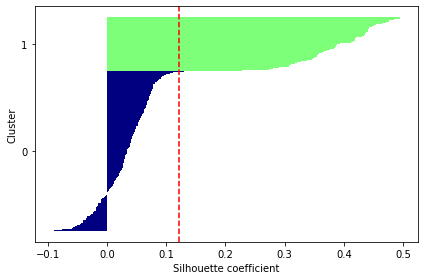

Homogeneity 	Completeness
-------------------------------------
0.016649644	0.016649644


In [111]:
plot_silhouettes(train_arr, clusters)

print('Homogeneity \tCompleteness\n-------------------------------------')
print('{1:.9f}\t{1:.9f}'.format(metrics.homogeneity_score(train_labels_arr, clusters),metrics.completeness_score(train_labels_arr, clusters)))

P

In [112]:
from sklearn import decomposition

In [113]:
pca = decomposition.PCA(n_components=10)
data_PC = pca.fit(train_arr).transform(train_arr)

In [114]:
data_PC.shape

(392, 10)

In [115]:
np.set_printoptions(precision = 2, suppress=True)
print(data_PC)
np.set_printoptions()

[[  2.96  26.79   6.56 ...  -3.75   1.82  -4.17]
 [  2.92  23.66  -5.88 ...   0.14  -7.66  -2.89]
 [ 11.94   7.63  10.68 ...  -8.88   6.56   6.52]
 ...
 [ 11.3   -3.74 -16.48 ...  -4.2  -12.04  19.86]
 [-20.37 -18.03   5.11 ...  -4.37   4.94  -6.72]
 [-22.84 -13.43   3.85 ...  -6.8   -2.37  -5.21]]


In [118]:
n = 0
pca = decomposition.PCA(n_components=1)
data_PC = pca.fit(train_arr).transform(train_arr)
while np.sum(pca.explained_variance_ratio_) <.95:
    pca = decomposition.PCA(n_components=n)
    data_PC = pca.fit(train_arr).transform(train_arr)
    print('n={}\t'.format(n),np.sum(pca.explained_variance_ratio_))
    n +=1

n=0	 0.0
n=1	 0.14664832075989603
n=2	 0.28401762149333865
n=3	 0.38799429563910065
n=4	 0.4577387800120078
n=5	 0.5060147722734161
n=6	 0.5486128969123252
n=7	 0.5749858984952718
n=8	 0.5999434439491111
n=9	 0.6229711308084542
n=10	 0.6434204683363245
n=11	 0.6602620184651349
n=12	 0.6760571048994761
n=13	 0.6902731262709318
n=14	 0.7033190751255387
n=15	 0.7162136515901829
n=16	 0.7262731519320027
n=17	 0.7356722692638497
n=18	 0.7448458977140382
n=19	 0.7531023584211113
n=20	 0.7609749403441779
n=21	 0.7687303272908613
n=22	 0.7760929756366194
n=23	 0.7825242622641875
n=24	 0.7888093260788309
n=25	 0.7950044356815785
n=26	 0.800712741489998
n=27	 0.806274100559064
n=28	 0.811571710653318
n=29	 0.8165324202886239
n=30	 0.8210968176902073
n=31	 0.8255361952141734
n=32	 0.8297578543315164
n=33	 0.833856946989833
n=34	 0.8376245455455653
n=35	 0.8413504505304427
n=36	 0.8448699785832539
n=37	 0.8482184737100562
n=38	 0.8514551378579444
n=39	 0.8546321083845562
n=40	 0.8575038647030233
n

In [119]:
kmeans = KMeans(n_clusters= 2).fit(data_PC)
clusters_PC = kmeans.predict(data_PC)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

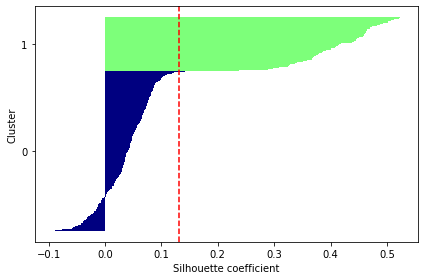

In [120]:
plot_silhouettes(data_PC, clusters_PC)

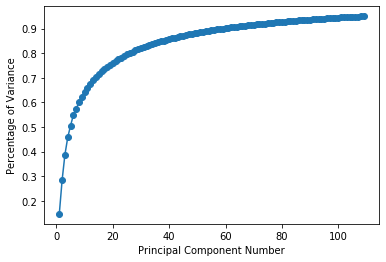

In [125]:

import matplotlib.pyplot as plt
%matplotlib inline

vari = pca.explained_variance_ratio_
cumulVar = []
running = 0
for i in range(len(vari)):
    running += vari[i]
    cumulVar.append(running)
cumulVar

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 110), cumulVar, marker='o')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [128]:
print('Homogeneity \tCompleteness\n-------------------------------------')
print('{1:.9f}\t{1:.9f}'.format(metrics.homogeneity_score(train_labels_arr, clusters_PC),metrics.completeness_score(train_labels_arr, clusters_PC)))

Homogeneity 	Completeness
-------------------------------------
0.016649644	0.016649644
